# Introduction
### Distance from a point to a hyperplane
In two dimensional space, we know a distance from a point like $(x_0, y_0)$ to a line $w_1x + w_2y + b = 0$ is given by:

$$ \frac{|w_1x_0 + w_2y_0 + b|}{\sqrt{w_1^2 + w_2^2}} $$
Same in three dimension:

$$ \frac{|w_1x_0 + w_2y_0 + w_3z_0 + b|}{\sqrt{w_1^2 + w_2^2 + w_3^2}} $$
If we remove the absolute from the numerator, we get the signed distance. The sign of the distance tells us on which side of the hyperplane the point is located. Which:
- Same positive sign means the point is on the same side of the normal vector, in the other hand, negative sign means the point is on the opposite side of the normal vector.
- Any point on the hyperplane has a distance of zero. (numerator is zero)
From that we have a general formula for the distance from a point to a hyperplane in n-dimensional space:

$$ \frac{|w_1x_1 + w_2x_2 + ... + w_nx_n + b|}{\sqrt{w_1^2 + w_2^2 + ... + w_n^2}} $$

The the general formula:

$$\frac{w^Tx_0 + b}{||w||_2}$$

Where:
- $\|w\|_2 = \sqrt{\sum_{i = 1}^d w_i^2}$ with $d$ is the number of dimensions.

### Recall classfication task

Let us return to the problem in Perceptron Learning Algorithm (PLA). Suppose that there are two different classes described by points in a high-dimensional space, these two classes are ***linearly separable***, that is, there exists a hyperplane that exactly separates the two classes. Let us find a hyperplane that separates the two classes, that is, all the points belonging to one class lie on the same side of that hyperplane and opposite to all the points belonging to the other class. We already know that PLA can do this, but it can give us infinite solutions as shown in Figure

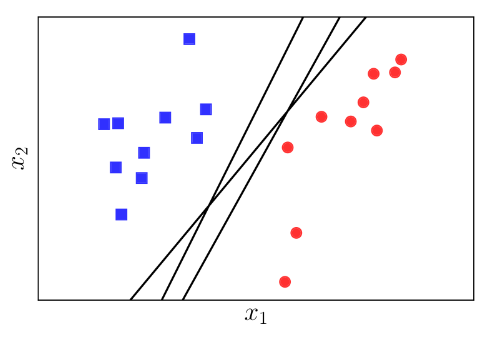

The question is: among those infinite number of dividing lines, which is the best dividing line according to some criteria? Of the three lines illustrated in Figure above, two are quite skewed towards the red circle class. This might make the red class unhappy because it seems to be encroaching on too much territory. Is there a way to find a dividing line that both classes feel is fair and happy?

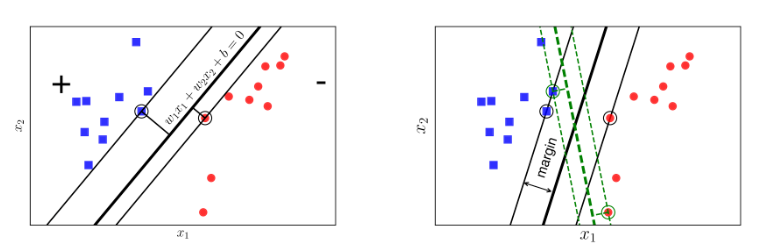

On the left figure, the line is too close to the red circle class, which might make the red class unhappy. We need something that is fair to both classes.

Take a look at the right one, the distance from the dividing line to the nearest points of each class is the same. Given the two separations by the solid black line and the dashed green line, which will make both classes happier? It is clearly the solid black line because it creates a wider margin.

Wider margins will give a better layering effect because the division between the two classes is more distinct. (Or we say in ML, it's global optimal)

The optimization problem in ***Support Vector Machine*** (SVM) is the problem of finding the dividing line so that the margin is the largest. This is also the reason why SVM is also called ***Maximum Margin Classifier***. The origin of the name Support Vector Machine will be clarified soon.

# Formulate optimization problem for SVM

Suppose that the data pairs of the **training set** are $(x_1, y_1), (x_2, y_2), \dots , (x_N, y_N)$ with vector $x_i \in \mathbb{R}^d$ representing the **input** of a data point and $y_i$ is the **label** of that data point. $d$ is the dimensionality of the data, and $N$ is the number of data points. Assume that the **label** of each data point is determined by $y_i = 1$ (class 1) or $y_i = -1$ (class 2), similar to in PLA.

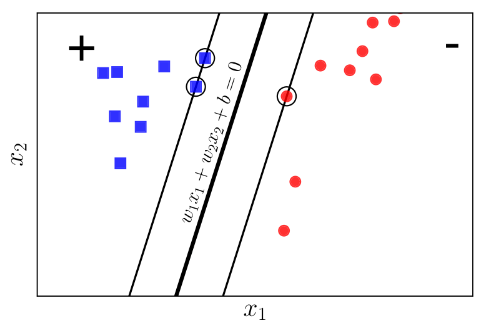

Assume that the **blue square points** belong to class 1, and the **red circular points** belong to class -1. The plane $w^T x + b = w_1 x_1 + w_2 x_2 + b = 0$ is the **separating plane** between the two classes. Moreover, class 1 lies on the **positive side**, and class -1 lies on the **negative side** of the separating plane. If the opposite is true, we can simply change the signs of $w$ and $b$. Note that we need to find the coefficients of $w$ and $b$.

With any pair $(x_i, y_i)$, the distance from the point $x_i$ to the separating plane is given by:

$$ \frac{y_i(w^T x_i + b)}{\|w\|_2} $$

This can be easily seen, assume $y_i$ always have the same sign with $x_i$, or $w^T x_i + b$. Or numerical is non-negative

With the above division surface, the margin is calculated as the closest distance from a point to that surface (regardless of which point is in the two classes):


$$\text{margin} = \min_{i=1,2,\dots,N} \frac{y_i(w^T x_i + b)}{\|w\|_2}$$

And the optimization problem of SVM is to find the coefficients $w$ and $b$ so that the margin is maximized. This is equivalent to the following optimization problem:

$$(w, b) = \text{arg}\max_{w, b} \left\{ \min_{i=1,2,\dots,N} \frac{y_i(w^T x_i + b)}{\|w\|_2} \right\} = \text{arg}\max_{w, b} \left\{ \frac{1}{\|w\|_2} \min_{i=1,2,\dots,N} y_i(w^T x_i + b) \right\}$$


Solving this problem directly would be very complicated, but you will see that there are ways to reduce it to a simpler problem.

If we change vector $w$ by $kw$ and $b$ by $kb$, and $k$ is a positive constant, the the margin still the same, thus the distance from the point to the separating plane is also the same. So we can set the margin to 1:

$$y_n(w^T x_n + b) = 1$$

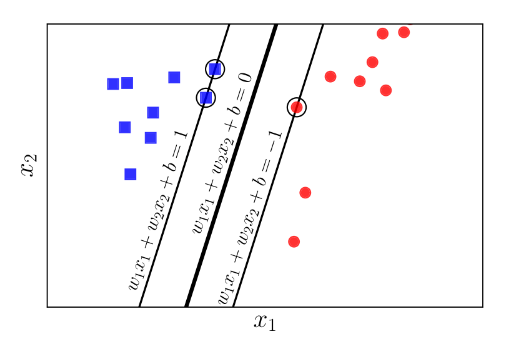

Just like that, with any $n$ we have:

$$y_n(w^Tx_n + b) \geq 1$$

Then the optimization problem (with constraint) can be written as:

$$(w, b) = \arg \max_{w, b} \frac{1}{\|w\|_2} \\
\text{subject to:} y_n(w^Tx_n + b) \geq 1, \forall n = 1, 2, \dots, N$$

Equal to 1 with simple transformation, we can make this problem about the problem below:
$$(w, b) = \arg \min_{w, b} \frac{1}{2} \|w\|_2^2 \\
\text{subject to: } 1 - y_n(w^Tx_n + b) \leq 0, \forall n = 1, 2, \dots, N$$

Here, we have taken the inverse of the objective function, squared it to get a differentiable function, and multiplied by $\frac{1}{2}$ to make better derivatives.

**Important note**: The target function the problem above is a convex set. Each of them have a constraint is linear function by $w$ and $b$. So this is a convex optimization problem. Further more it's Quadratic Programming, beside the target function is also a **strictly convex function** because $\|w\|_2^2 = w^TIw$ and $I$ is a identity matrix - a positive definite matrix. So the solution is unique.

# Duality problem for SVM

### Slater condition

Slater condition said that, if exist $w$, $b$ satisfies:

$$1 - y_n(w^Tx_n + b) < 0, \forall n = 1, 2, \dots, N$$

Then the strong duality holds, that is, the optimal value of the primal problem is equal to the optimal value of the dual problem.

In PLA, we already know that there's always a hyperlane that divides two classes that are linearly separable. Which means it have a solution => Feasible set of the optimization problem must be empty => Alway exist a pair $(w_0, b_0)$ that satisfies Slater condition:

$$1 - y_n(w_0^Tx_n + b_0) \leq 0, \forall n = 1, 2, \dots, N \\
\Leftrightarrow 2 - y_n(2w_0^Tx_n + 2b_0) \leq 0, \forall n = 1, 2, \dots, N$$

So we just need to choose, $w_1 = 2w_0$ and $b_1 = 2b_0$, we will have:

$$
1 + 1 - y_n(w_1^Tx_n + b_1) \leq 0, \forall n = 1, 2, \dots, N \\
1 - y_n(w_1^Tx_n + b_1) \leq -1 < 0, \forall n = 1, 2, \dots, N
$$

### Lagrangian of SVM

The Lagrangian formula is:

$$\mathcal{L}(w, b, \lambda) = \frac{1}{2}(\|w\|_2^2) + \sum_{n = 1}^{N} \lambda_n(1 - y_n(w^Tx_n + b))$$

Where $\lambda = [\lambda_1, \lambda_2, \dots, \lambda_N]^T$ and $\lambda_n \geq 0, \forall n = 1, 2, \dots, N$ are the Lagrange multipliers.

### Duality of Lagrangian

Duality of Lagrangian is defined as:

$$g(\lambda) = \min_{w, b} \mathcal{L}(w, b, \lambda)$$

Where $\lambda \succeq 0$

To fine the smallest value of this function by $w$ and $b$ can be done by solving the system of differential equations of $\mathcal{L}$ by $w$ and $b$ equal to zero:

$$\frac{\partial \mathcal{L}}{\partial w} = w - \sum_{n = 1}^{N} \lambda_n y_n x_n = 0 \Rightarrow w = \sum_{n = 1}^{N} \lambda_n y_n x_n \\
\frac{\partial \mathcal{L}}{\partial b} = -\sum_{n = 1}^{N} \lambda_n y_n = 0 \\

With this two equations, replace it into Lagrangian of SVM, we have the ***most important*** formula in SVM:

$$g(\lambda) = \sum_{n = 1}^{N} \lambda_n - \frac{1}{2} \sum_{n = 1}^{N} \sum_{m = 1}^{N} \lambda_n \lambda_m y_n y_m x_n^T x_m$$

Consider the matrix:

$$V = [y_1x_1, y_2x_2, \dots, y_Nx_N]$$

and vector $1 = [1, 1, \dots, 1]^T$, we can rewrite the formula above as:

$$g(\lambda) = 1^T \lambda - \frac{1}{2} \lambda^T V^T V \lambda$$

Set $K = V^T V$, we can see that K is a positive semi-definite matrix. Thus, with any vector $\lambda$, we have:

$$\lambda^T K \lambda = \lambda^T V^T V \lambda = \|V\lambda\|_2^2 \geq 0$$

Then $g(\lambda)$ is a concave function.

### Lagrangian duality problem

From there, a connection between Lagrangian duality and the constraints of $\lambda$, we can conduct:

$$\lambda = \arg \max_{\lambda} g(\lambda) \\
\text{subject to: } \lambda \succeq 0, \sum_{n = 1}^{N} \lambda_n y_n = 0$$

In this problem, the parameters must find is $N$, dimension of $\lambda$, which number of data points. Meanwhile, in the original problem, the number of parameter have to find is $d + 1$, is the sum of dimension of $w$ and $b$, which the number of features plus 1. In many application , so number of data points contain in training set more larger than the number of features. If we directly solve the using tool like `cvxopt`, then it can be more complex (time consumer) compare to original problem. However, the attractive point of this problem coming from Kernel SVM which for the problem that data is not linearly separable or semi-linearly separable.

### KKT conditions

Back with the math problem, because this is a conveex optimization and strong duality is satisfy, the KKT conditions with $w$, $b$, $\lambda$ is:

$$1 - y_n(w^Tx_n + b) \leq 0, \forall n = 1, 2, \dots, N \\
\lambda_n \geq 0, \forall n = 1, 2, \dots, N \\
\lambda_n(1 - y_n(w^Tx_n + b)) = 0, \forall n = 1, 2, \dots, N \\
w = \sum_{n = 1}^{N} \lambda_n y_n x_n \\
\sum_{n = 1}^{N} \lambda_n y_n = 0$$

In every case above, the third conditions is the most interesting. From there we can deduce $\lambda = 0$ or $1 - y_n(w^Tx_n + b) = 0$. Second conditions will be:

$$w^T x_n + b = y_n$$

where $y_n^2 = 1, \forall n$

Any point satisfy second condition is called **support vector**, which closet  to the separating plane.

With all the problem with a small number of *N* data point, we can continue solving the KKT condition by using $\lambda = 0$ or $\lambda \neq 0$. The total number of cases to be considered is $2^N$. With $N > 50$ (usually), it's impossible to solve this problem directly. I will not dive in and tell you why here.

After finding $\lambda$, we can infer $w$ based on:

$$w = \sum_{n = 1}^{N} \lambda_n y_n x_n$$

And $b$ by:

$$\lambda (1 - y_n(w^Tx_n + b)) = 0$$

$$\sum_{n = 1}^{N} \lambda_n y_n = 0$$

Call $\mathcal{S} = {n : \lambda_n \neq 0}$ and $N_{\mathcal{S}}$ is the number of support vector, which each $n \in \mathcal{S}$:

$$ 1 = y_n(w^Tx_n + b) \Leftrightarrow b + w^Tx_n = y_n$$

However, by just one pair of $(x_n, y_n)$, we can infer $b$ if $w$ is known, another version to find $b$ is:

$$b = \frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}} (y_n - w^Tx_n) = \frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}} (y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m x_m^T x_n)$$

Then we will have the final equation for SVM:

$$w^Tx + b = \sum_{n \in \mathcal{S}} \lambda_n y_n x_n^T x + \frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}} (y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m x_m^T x)$$